<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Implementación de Sistemas Data-driven.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Tarea 0. Básicos de metaflow.</h2></font> 

#### Daniel Ruiz Riquelme
https://docs.metaflow.org/metaflow/basics

## Install dependencies

In [ ]:
# Dependencies
#!pip install metaflow

## Set username for Metaflow

In [ ]:
# Set username for workflows
import os
os.environ["USERNAME"] = "daniel"

# Linear flow

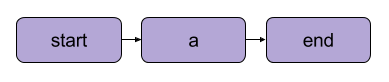

In [ ]:
%%writefile metaflow_basics_linearflow.py
from metaflow import FlowSpec, step

class LinearFlow(FlowSpec):

    @step
    def start(self):
        self.my_var = 'hello world'
        self.next(self.a)

    @step
    def a(self):
        print('the data artifact is: %s' % self.my_var)
        self.next(self.end)

    @step
    def end(self):
        print('the data artifact is still: %s' % self.my_var)

if __name__ == '__main__':
    LinearFlow()

In [ ]:
!python metaflow_basics_linearflow.py run

# Branches
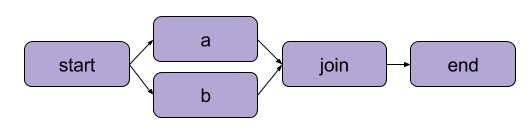

In [ ]:
%%writefile metaflow_basics_branchflow.py
from metaflow import FlowSpec, step

class BranchFlow(FlowSpec):

    @step
    def start(self):
        self.next(self.a, self.b)

    @step
    def a(self):
        self.x = 1
        self.next(self.join)

    @step
    def b(self):
        self.x = 2
        self.next(self.join)

    @step
    def join(self, inputs):
        print('a is %s' % inputs.a.x)
        print('b is %s' % inputs.b.x)
        print('total is %d' % sum(input.x for input in inputs))
        self.next(self.end)

    @step
    def end(self):
        pass

if __name__ == '__main__':
    BranchFlow()

In [ ]:
!python metaflow_basics_branchflow.py run

# Foreach
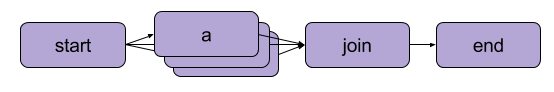

In [ ]:
%%writefile metaflow_basics_foreachflow.py
from metaflow import FlowSpec, step

class ForeachFlow(FlowSpec):

    @step
    def start(self):
        self.titles = ['Stranger Things',
                       'House of Cards',
                       'Narcos']
        self.next(self.a, foreach='titles')

    @step
    def a(self):
        self.title = '%s processed' % self.input
        self.next(self.join)

    @step
    def join(self, inputs):
        self.results = [input.title for input in inputs]
        self.next(self.end)

    @step
    def end(self):
        print('\n'.join(self.results))

if __name__ == '__main__':
    ForeachFlow()

In [ ]:
!python metaflow_basics_foreachflow.py run

# Defining parameters

In [ ]:
%%writefile metaflow_basics_parameterflow.py
from metaflow import FlowSpec, Parameter, step

class ParameterFlow(FlowSpec):
    alpha = Parameter('alpha',
                      help='Learning rate',
                      default=0.01)

    @step
    def start(self):
        print('alpha is %f' % self.alpha)
        self.next(self.end)

    @step
    def end(self):
        print('alpha is still %f' % self.alpha)

if __name__ == '__main__':
    ParameterFlow()

In [ ]:
!python metaflow_basics_parameterflow.py run --alpha 0.6